     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 104.3 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 105.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 93.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 121.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 91.2 MB/s eta 0:00:00
   ━━

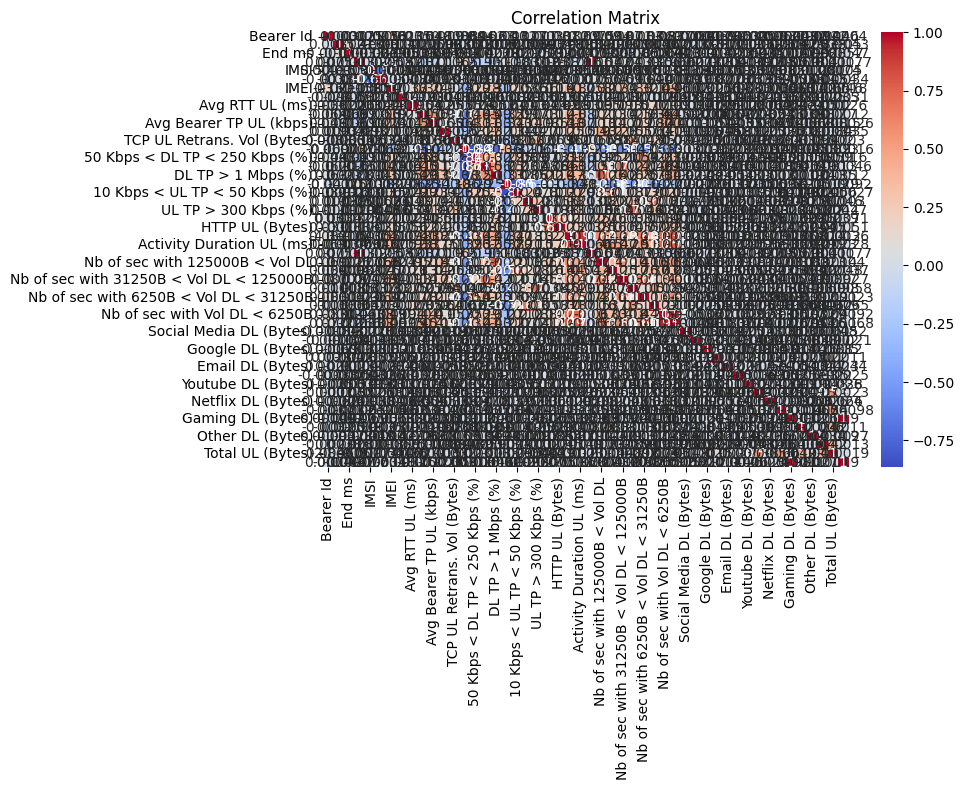


Cleaned data saved to cleaned_telecom_data.csv

Connected to SQLite database at telecom_data.db
Cleaned data loaded into SQLite database in table 'telecom_data'.

First few rows from SQLite database:
       Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Locat

In [1]:
# Install necessary packages (if not already installed)
# Uncomment the line below if running in an environment where these packages are not installed
!pip install pandas seaborn matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# 1. Load the dataset from the CSV file
df = pd.read_csv('Week1_challenge_data_source(CSV).csv')

# 2. Display the first few rows
print("First few rows of the dataset:\n", df.head())

# 3. Check for null values
null_values = df.isnull().sum()
print("\nNull values in each column:\n", null_values)

# 4. Basic statistics
stats = df.describe()
print("\nStatistical summary:\n", stats)

# 5. Data types
data_types = df.dtypes
print("\nData types:\n", data_types)

# 6. Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")

# 7. Remove duplicate rows (if needed)
df_cleaned = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")

# 8. Check the exact column names
print("\nColumn names:\n", df_cleaned.columns.tolist())

# 9. Check if 'Date' column exists and process it
if 'Date' in df_cleaned.columns:
    try:
        # Convert 'Date' column to datetime
        df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
        print("\nConverted 'Date' column to datetime.")
        
        # Check for any conversion issues
        if df_cleaned['Date'].isnull().any():
            print("Some 'Date' values could not be converted and are set to NaT.")
        
        # Example of creating a new feature: extracting the month from the date column
        df_cleaned['Month'] = df_cleaned['Date'].dt.month
        print("Added 'Month' feature based on 'Date' column.")
    except Exception as e:
        print(f"Error converting 'Date' column: {e}")
else:
    print("\nNo 'Date' column found in the dataset.")

# 10. Select only numeric columns for the correlation matrix
numeric_df = df_cleaned.select_dtypes(include=['number'])

# 11. Correlation matrix
correlation_matrix = numeric_df.corr()

# 12. Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 13. Save cleaned data to a new CSV file
cleaned_csv_path = 'cleaned_telecom_data.csv'
df_cleaned.to_csv(cleaned_csv_path, index=False)
print(f"\nCleaned data saved to {cleaned_csv_path}")

# 14. Create a connection to a new SQLite database
db_path = 'telecom_data.db'
conn = sqlite3.connect(db_path)
print(f"\nConnected to SQLite database at {db_path}")

# 15. Load the cleaned DataFrame into SQLite
table_name = 'telecom_data'
df_cleaned.to_sql(table_name, conn, if_exists='replace', index=False)
print(f"Cleaned data loaded into SQLite database in table '{table_name}'.")

# 16. Query the database
query = f"SELECT * FROM {table_name} LIMIT 5"  # Adjust LIMIT as needed
df_sql = pd.read_sql_query(query, conn)
print("\nFirst few rows from SQLite database:\n", df_sql.head())

# 17. Close the connection
conn.close()
print("\nSQLite connection closed.")

# 18. Example: Plotting the distribution of a feature
feature_to_plot = 'SomeFeature'  # Replace with an actual numeric column name
if feature_to_plot in df_cleaned.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df_cleaned[feature_to_plot].dropna(), kde=True)
    plt.title(f'Distribution of {feature_to_plot}')
    plt.xlabel(feature_to_plot)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print(f"\nNo '{feature_to_plot}' column found in the dataset.")

# 19. Example: Time series plot (if applicable)
feature_to_plot_ts = 'AnotherFeature'  # Replace with an actual numeric column name
if 'Date' in df_cleaned.columns and feature_to_plot_ts in df_cleaned.columns:
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Date', y=feature_to_plot_ts, data=df_cleaned)
    plt.title(f'Time Series of {feature_to_plot_ts}')
    plt.xlabel('Date')
    plt.ylabel(feature_to_plot_ts)
    plt.tight_layout()
    plt.show()
else:
    print(f"\nTime series plot cannot be created because 'Date' or '{feature_to_plot_ts}' column is missing.")
